Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from joblib import dump, load
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import math

df = pd.read_csv('data/all_processed.csv')
y = df['status']
X = df['text']

# td  = TfidfVectorizer()
td = load('models/td_both')
X = td.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [2]:
model_file = 'models/svm_both'
clf = load(model_file)

# n = int(math.sqrt(X_train.shape[0]))

# clf = KNeighborsClassifier(n_neighbors=5)
# clf.fit(X_train, y_train)

# clf = svm.SVC()
# clf.fit(X_train, y_train)

In [3]:
y_pred = clf.predict(X_test)

In [4]:
classification_report = classification_report(y_test, y_pred)

print()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'Classification Report:')
print(f'======================================================')
print(f'{classification_report}')
print(f'======================================================')


Accuracy: 0.9646810753821824

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1335
           1       0.97      0.91      0.94       562

    accuracy                           0.96      1897
   macro avg       0.97      0.95      0.96      1897
weighted avg       0.96      0.96      0.96      1897



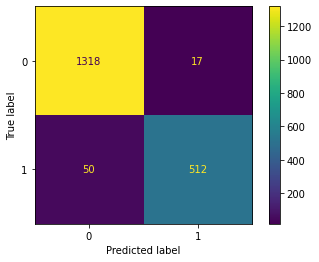

In [5]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)